# Exercício — O usuário terá um segundo encontro ou não?
## Importação das bibliotecas e inicialização do dataframe

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('base_segundo_encontro.csv', sep=";", encoding="latin-1")
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


## Entendendo a distribuição da existência de um segundo encontro com Countplot

<Axes: xlabel='segundo_encontro', ylabel='count'>

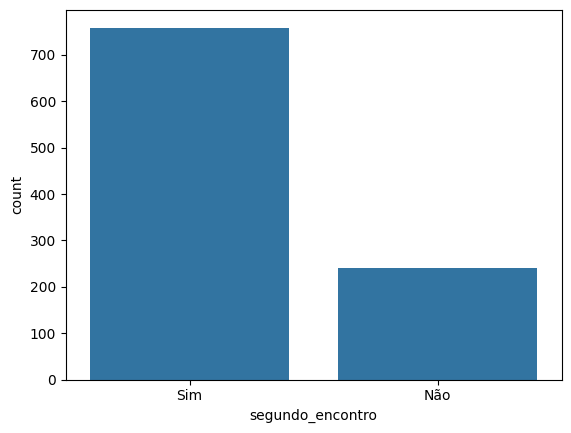

In [42]:
sns.countplot(x = df['segundo_encontro'])

## Separando os dados de features e os dados de target

In [43]:
x_date = df.iloc[:, 0:8].values
y_date = df.iloc[:, 8].values

## Usando One Hot Encoding nas variáveis categóricas

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_all = ColumnTransformer(
    transformers=[
        ('date_place', OneHotEncoder(), [6]),
        ('person_mood', OneHotEncoder(), [7])
    ],
    remainder='passthrough'
)

x_date = onehot_all.fit_transform(x_date)

## Utilizando o Standard Scaler

In [45]:
from sklearn.preprocessing import StandardScaler
scaler_date = StandardScaler()
x_date = scaler_date.fit_transform(x_date)